In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



In [2]:
generation_df=pd.read_csv('power.csv',parse_dates=['DATE_TIME'])
weather_df=pd.read_csv('weather.csv',parse_dates=['DATE_TIME'])

In [3]:
generation_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
weather_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [5]:
#Combining the two dataset now
df=pd.merge(generation_df.drop(columns=['PLANT_ID']),weather_df.drop(columns=['SOURCE_KEY','PLANT_ID']),on='DATE_TIME')
df.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            45680 non-null  datetime64[ns]
 1   SOURCE_KEY           45680 non-null  object        
 2   DC_POWER             45680 non-null  float64       
 3   AC_POWER             45680 non-null  float64       
 4   DAILY_YIELD          45680 non-null  float64       
 5   TOTAL_YIELD          45680 non-null  float64       
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 3.5+ MB


In [7]:
df.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION'],
      dtype='object')

In [8]:
df['SOURCE_KEY']=df['SOURCE_KEY'].astype('category')

In [9]:
df.sample(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1573,2020-05-15 18:00:00,ZoEaEvLYb1n2sOq,293.714286,28.357143,6255.142857,7104354.143,31.132414,30.225331,0.022545
15678,2020-05-23 07:15:00,3PZuoBAID5Wc2HD,2145.125000,210.225000,81.625000,7044697.625,22.737876,24.896301,0.146428
22210,2020-05-26 10:15:00,ZnxXDlPa8U1GXgE,8702.714286,850.228571,2225.285714,6606891.286,29.619524,55.347990,0.719330
39865,2020-06-15 05:15:00,rGa61gmuvPhdLxV,0.000000,0.000000,0.000000,7337972.000,21.424306,19.861635,0.000000
8754,2020-05-19 07:15:00,McdE0feGgRqW7Ca,2724.875000,267.325000,115.750000,7185206.750,24.505353,27.033671,0.187507


In [10]:
df.shape

(45680, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            45680 non-null  datetime64[ns]
 1   SOURCE_KEY           45680 non-null  category      
 2   DC_POWER             45680 non-null  float64       
 3   AC_POWER             45680 non-null  float64       
 4   DAILY_YIELD          45680 non-null  float64       
 5   TOTAL_YIELD          45680 non-null  float64       
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(7)
memory usage: 3.2 MB


In [12]:
df.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,45680.000000,45680.000000,45680.000000,4.568000e+04,45680.000000,45680.000000,45680.000000
mean,3197.175971,312.652679,3313.146538,6.957007e+06,25.917168,31.877975,0.236834
std,4080.448523,398.668968,3156.100252,4.172386e+05,3.556550,12.638448,0.306316
min,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000
25%,0.000000,0.000000,0.000000,6.512358e+06,22.930031,21.406390,0.000000
50%,464.196429,44.912500,2653.633928,7.115711e+06,24.993020,25.379072,0.035266
75%,6478.424107,634.481250,6318.000000,7.244521e+06,28.379008,42.757119,0.459503
max,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652


# EDA

In [13]:
df.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION'],
      dtype='object')

In [14]:
cols=['DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION']

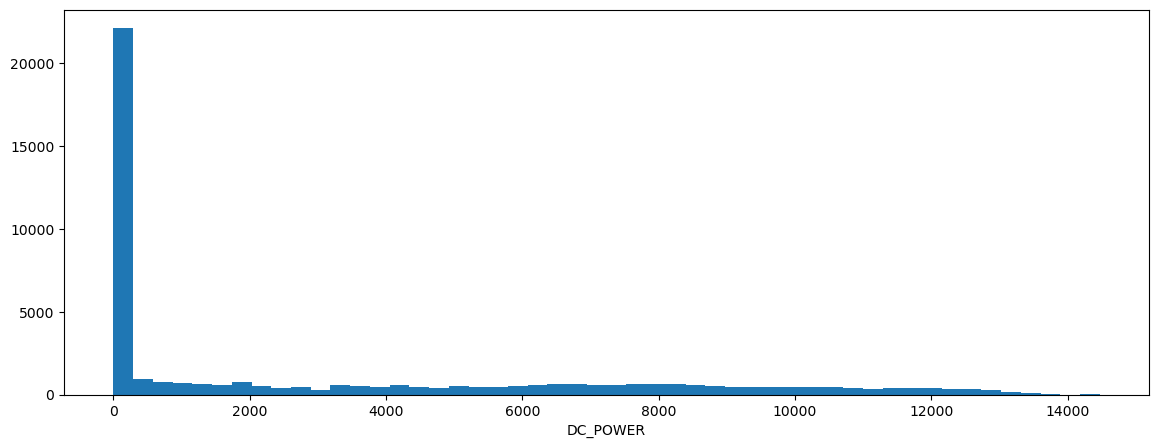

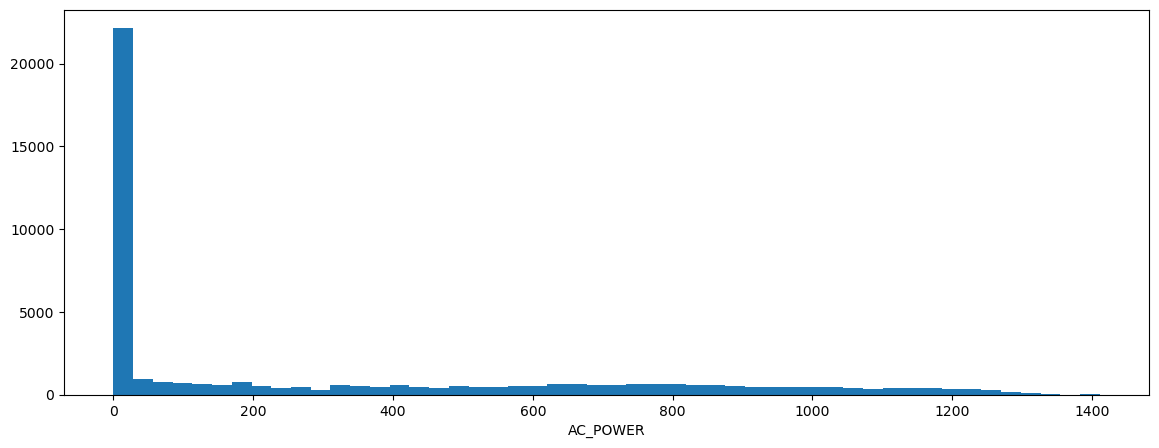

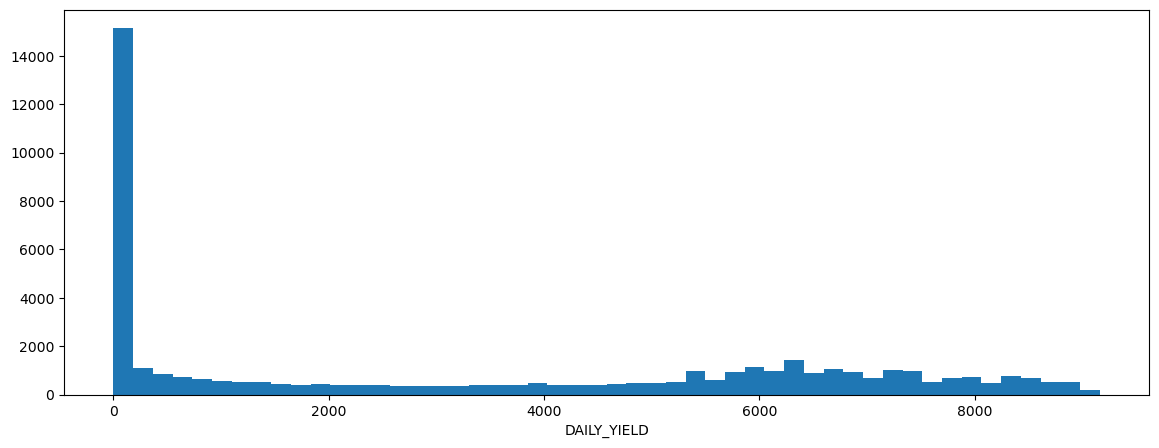

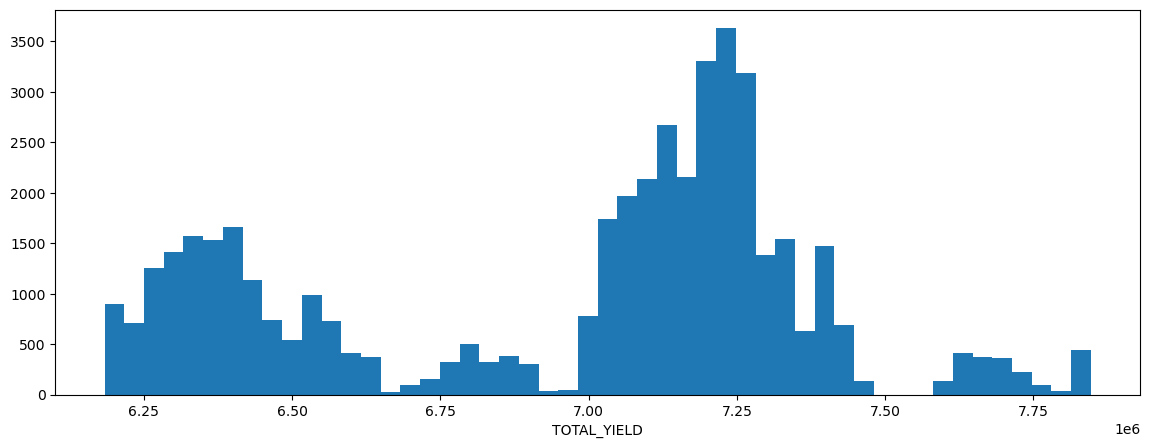

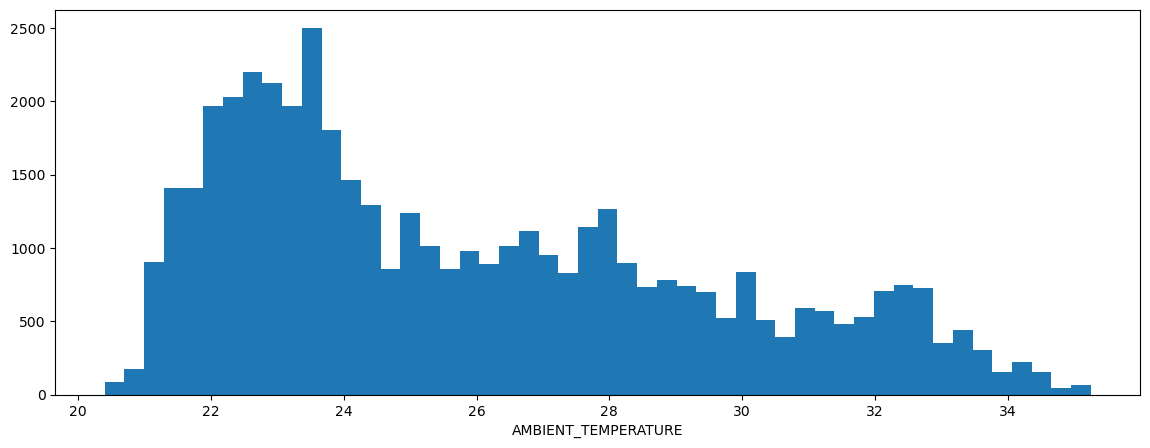

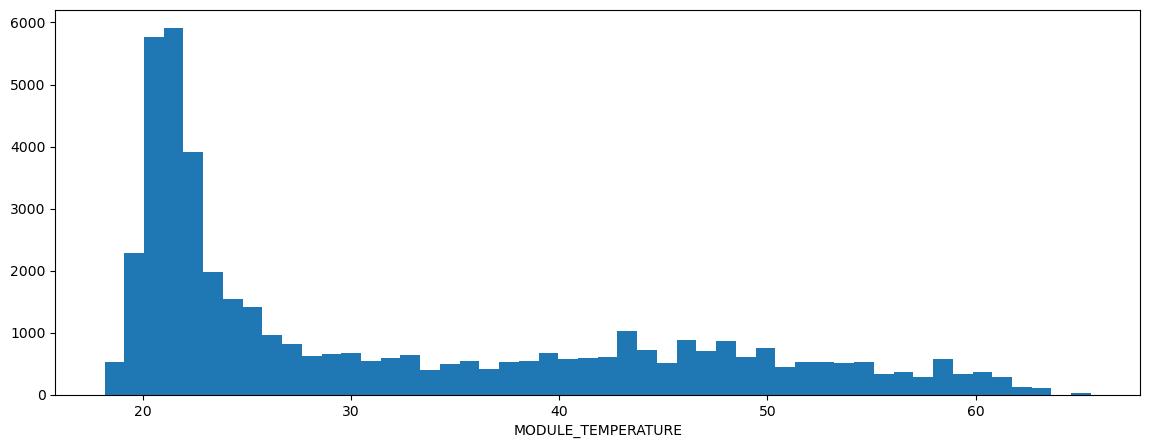

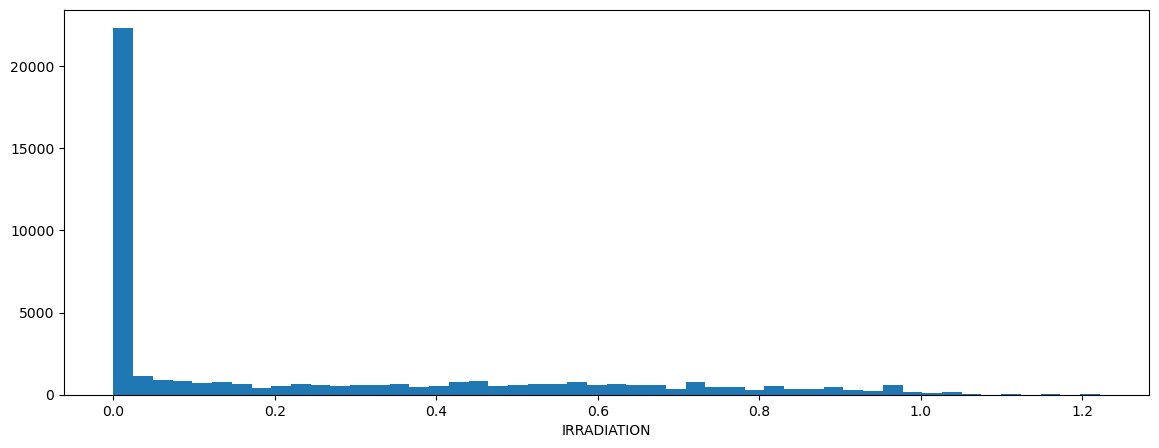

In [15]:
for i in cols:
    plt.figure(figsize=(14,5))
    plt.hist(df[i],bins=50)
    plt.xlabel(i)
    plt.show()


In [16]:
df.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION'],
      dtype='object')

<Axes: xlabel='IRRADIATION', ylabel='AC_POWER'>

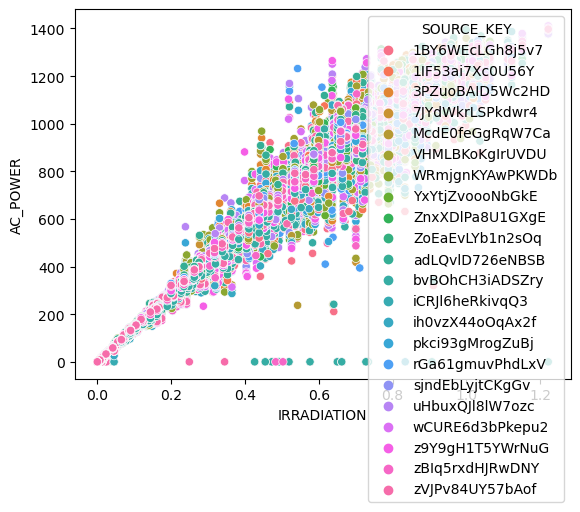

In [17]:
sns.scatterplot(x='IRRADIATION', y='AC_POWER', hue='SOURCE_KEY', data=df)


In [18]:
#LETS US use the DATE_TIME Column to get day,month,year and so on
df['Month']=df['DATE_TIME'].dt.month
df['Hour']=df['DATE_TIME'].dt.hour
df['Day']=df['DATE_TIME'].dt.day
df['Date']=df['DATE_TIME'].dt.date
df['Minute']=df['DATE_TIME'].dt.minute

In [19]:
df.sample(3)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Month,Hour,Day,Date,Minute
40032,2020-06-15 07:15:00,WRmjgnKYAwPKWDb,2134.714286,209.171429,155.142857,7254739.143,23.271853,27.688371,0.160229,6,7,15,2020-06-15,15
37833,2020-06-14 06:15:00,YxYtjZvoooNbGkE,314.000000,30.362500,4.875000,7399443.875,22.568170,21.947760,0.024172,6,6,14,2020-06-14,15
21066,2020-05-25 21:15:00,ZnxXDlPa8U1GXgE,0.000000,0.000000,8910.000000,6604666.000,26.743371,25.456490,0.000000,5,21,25,2020-05-25,15


In [20]:
df['IRRADIATION'].describe()

count    45680.000000
mean         0.236834
std          0.306316
min          0.000000
25%          0.000000
50%          0.035266
75%          0.459503
max          1.221652
Name: IRRADIATION, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            45680 non-null  datetime64[ns]
 1   SOURCE_KEY           45680 non-null  category      
 2   DC_POWER             45680 non-null  float64       
 3   AC_POWER             45680 non-null  float64       
 4   DAILY_YIELD          45680 non-null  float64       
 5   TOTAL_YIELD          45680 non-null  float64       
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
 9   Month                45680 non-null  int64         
 10  Hour                 45680 non-null  int64         
 11  Day                  45680 non-null  int64         
 12  Date                 45680 non-null  object        
 13  Minute               45680 non-

In [22]:
df["DATE_TIME"]

0       2020-05-15 00:00:00
1       2020-05-15 00:00:00
2       2020-05-15 00:00:00
3       2020-05-15 00:00:00
4       2020-05-15 00:00:00
                ...        
45675   2020-06-17 23:45:00
45676   2020-06-17 23:45:00
45677   2020-06-17 23:45:00
45678   2020-06-17 23:45:00
45679   2020-06-17 23:45:00
Name: DATE_TIME, Length: 45680, dtype: datetime64[ns]

In [23]:
df['Date'].describe()

count          45680
unique            23
top       2020-05-30
freq            2112
Name: Date, dtype: object

<Axes: xlabel='Date'>

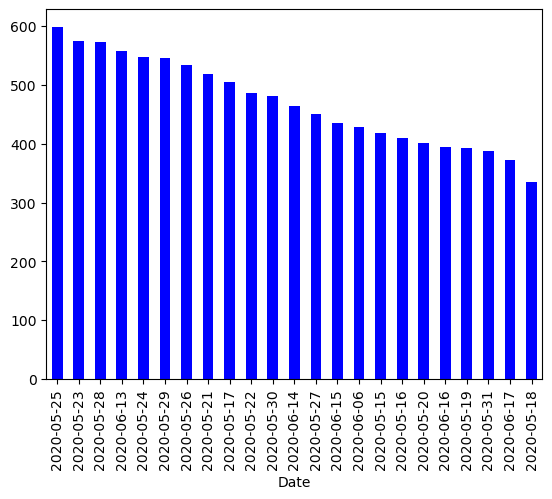

In [24]:
solar_irrad=df.groupby('Date')['IRRADIATION'].sum()
solar_irrad.sort_values(ascending=False).plot(kind='bar',color='b')

<Axes: xlabel='Date'>

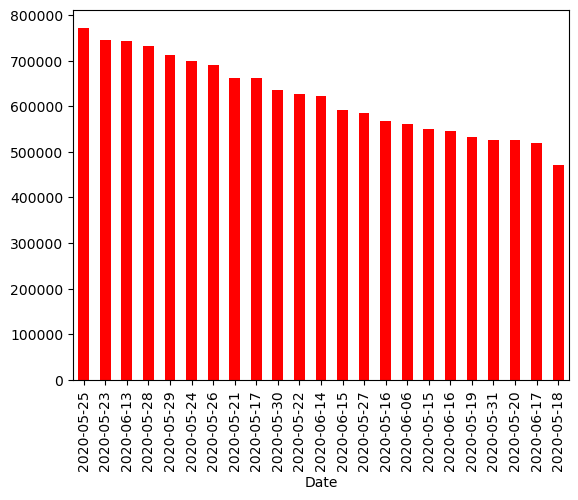

In [25]:
ac_electric=df.groupby('Date')['AC_POWER'].sum().sort_values(ascending=False).plot(kind='bar',color='r')
ac_electric

<Axes: xlabel='Date'>

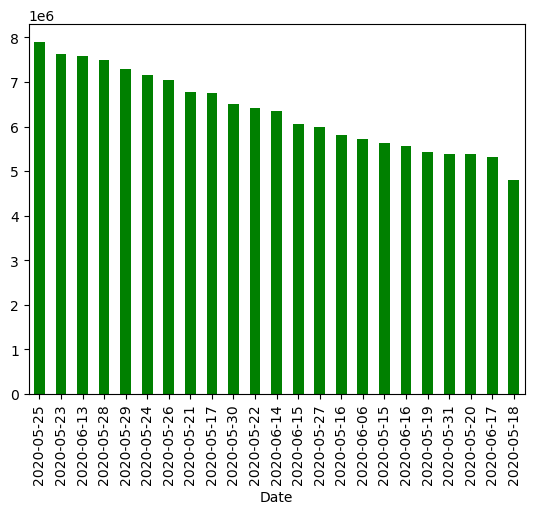

In [26]:
dc_electric=df.groupby('Date')['DC_POWER'].sum().sort_values(ascending=False).plot(kind='bar',color='g')
dc_electric

In [27]:
df.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9428\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Month,Hour,Day,Minute
DC_POWER,1.000000,0.999996,0.076710,0.004055,0.703796,0.954692,0.991305,-0.042781,0.012174,0.049284,-0.000089
AC_POWER,0.999996,1.000000,0.076628,0.004043,0.704035,0.954810,0.991260,-0.042688,0.012144,0.049162,-0.000099
DAILY_YIELD,0.076710,0.076628,1.000000,0.007277,0.489709,0.203702,0.071937,-0.012850,0.823608,0.030742,0.015915
TOTAL_YIELD,0.004055,0.004043,0.007277,1.000000,-0.036532,-0.014713,-0.004981,0.167196,0.005257,-0.053243,0.000088
AMBIENT_TEMPERATURE,0.703796,0.704035,0.489709,-0.036532,1.000000,0.843456,0.702218,-0.237136,0.323144,0.164977,-0.000860
MODULE_TEMPERATURE,0.954692,0.954810,0.203702,-0.014713,0.843456,1.000000,0.959346,-0.116531,0.103834,0.105859,-0.003603
IRRADIATION,0.991305,0.991260,0.071937,-0.004981,0.702218,0.959346,1.000000,-0.051316,0.009266,0.056562,-0.001372
Month,-0.042781,-0.042688,-0.012850,0.167196,-0.237136,-0.116531,-0.051316,1.000000,-0.012082,-0.678315,0.000818
Hour,0.012174,0.012144,0.823608,0.005257,0.323144,0.103834,0.009266,-0.012082,1.000000,0.015689,-0.002463
Day,0.049284,0.049162,0.030742,-0.053243,0.164977,0.105859,0.056562,-0.678315,0.015689,1.000000,-0.001047


C:\Users\Acer\AppData\Local\Temp\ipykernel_9428\3755738349.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


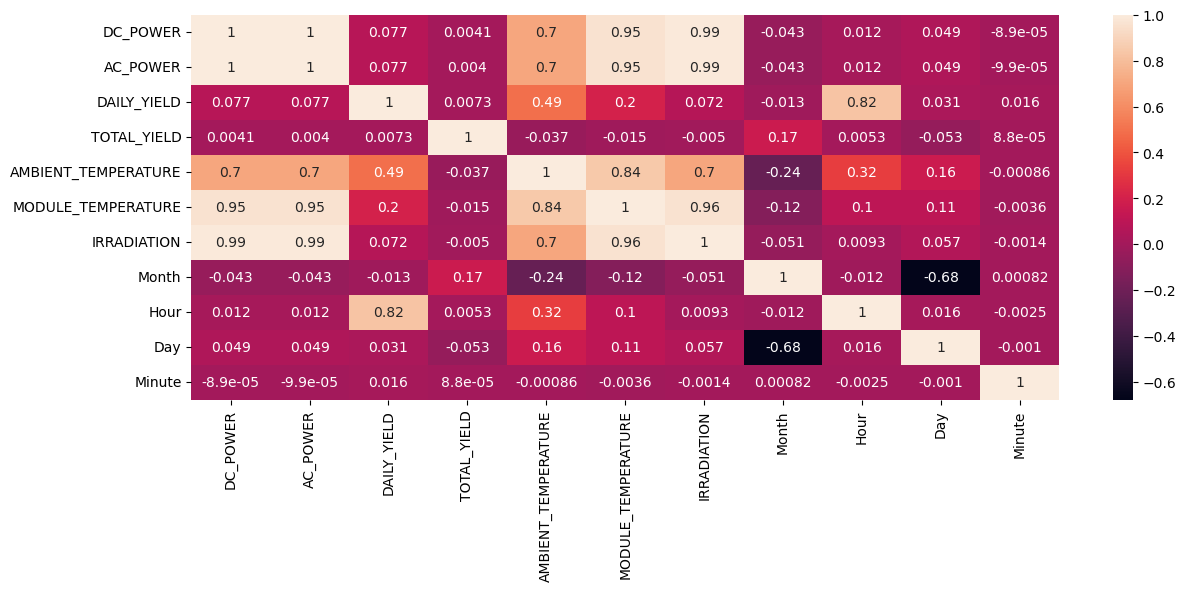

In [28]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [29]:
# sns.pairplot(df)

# Preprocessing

In [30]:
df.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'Month', 'Hour', 'Day', 'Date', 'Minute'],
      dtype='object')

In [31]:
cols=['DC_POWER','MODULE_TEMPERATURE','DC_POWER','Month','Date','DATE_TIME']
df.drop(columns=cols,axis=1,inplace=True)
df.head()

,SOURCE_KEY,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION,Hour,Day,Minute
0,1BY6WEcLGh8j5v7,0.0,0.0,6259559.0,25.184316,0.0,0,15,0
1,1IF53ai7Xc0U56Y,0.0,0.0,6183645.0,25.184316,0.0,0,15,0
2,3PZuoBAID5Wc2HD,0.0,0.0,6987759.0,25.184316,0.0,0,15,0
3,7JYdWkrLSPkdwr4,0.0,0.0,7602960.0,25.184316,0.0,0,15,0
4,McdE0feGgRqW7Ca,0.0,0.0,7158964.0,25.184316,0.0,0,15,0


In [32]:
df.columns

Index(['SOURCE_KEY', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD',
       'AMBIENT_TEMPERATURE', 'IRRADIATION', 'Hour', 'Day', 'Minute'],
      dtype='object')

In [33]:
source=df['SOURCE_KEY'].unique()
source_str=','.join(source)
source_str

'1BY6WEcLGh8j5v7,1IF53ai7Xc0U56Y,3PZuoBAID5Wc2HD,7JYdWkrLSPkdwr4,McdE0feGgRqW7Ca,VHMLBKoKgIrUVDU,WRmjgnKYAwPKWDb,ZnxXDlPa8U1GXgE,ZoEaEvLYb1n2sOq,adLQvlD726eNBSB,bvBOhCH3iADSZry,iCRJl6heRkivqQ3,ih0vzX44oOqAx2f,pkci93gMrogZuBj,rGa61gmuvPhdLxV,sjndEbLyjtCKgGv,uHbuxQJl8lW7ozc,wCURE6d3bPkepu2,z9Y9gH1T5YWrNuG,zBIq5rxdHJRwDNY,zVJPv84UY57bAof,YxYtjZvoooNbGkE'

In [34]:
df['Minute'].describe()

count    45680.000000
mean        22.484895
std         16.777147
min          0.000000
25%          0.000000
50%         15.000000
75%         30.000000
max         45.000000
Name: Minute, dtype: float64

In [35]:
df.head()

,SOURCE_KEY,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION,Hour,Day,Minute
0,1BY6WEcLGh8j5v7,0.0,0.0,6259559.0,25.184316,0.0,0,15,0
1,1IF53ai7Xc0U56Y,0.0,0.0,6183645.0,25.184316,0.0,0,15,0
2,3PZuoBAID5Wc2HD,0.0,0.0,6987759.0,25.184316,0.0,0,15,0
3,7JYdWkrLSPkdwr4,0.0,0.0,7602960.0,25.184316,0.0,0,15,0
4,McdE0feGgRqW7Ca,0.0,0.0,7158964.0,25.184316,0.0,0,15,0


In [36]:
new_df=df.copy()
new_df.head()

,SOURCE_KEY,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION,Hour,Day,Minute
0,1BY6WEcLGh8j5v7,0.0,0.0,6259559.0,25.184316,0.0,0,15,0
1,1IF53ai7Xc0U56Y,0.0,0.0,6183645.0,25.184316,0.0,0,15,0
2,3PZuoBAID5Wc2HD,0.0,0.0,6987759.0,25.184316,0.0,0,15,0
3,7JYdWkrLSPkdwr4,0.0,0.0,7602960.0,25.184316,0.0,0,15,0
4,McdE0feGgRqW7Ca,0.0,0.0,7158964.0,25.184316,0.0,0,15,0


In [37]:
#labelencoding
le=LabelEncoder()
df['SOURCE_KEY']=le.fit_transform(df['SOURCE_KEY'])
source_map=dict(zip(le.classes_,le.transform(le.classes_)))
source_map

{'1BY6WEcLGh8j5v7': 0,
 '1IF53ai7Xc0U56Y': 1,
 '3PZuoBAID5Wc2HD': 2,
 '7JYdWkrLSPkdwr4': 3,
 'McdE0feGgRqW7Ca': 4,
 'VHMLBKoKgIrUVDU': 5,
 'WRmjgnKYAwPKWDb': 6,
 'YxYtjZvoooNbGkE': 7,
 'ZnxXDlPa8U1GXgE': 8,
 'ZoEaEvLYb1n2sOq': 9,
 'adLQvlD726eNBSB': 10,
 'bvBOhCH3iADSZry': 11,
 'iCRJl6heRkivqQ3': 12,
 'ih0vzX44oOqAx2f': 13,
 'pkci93gMrogZuBj': 14,
 'rGa61gmuvPhdLxV': 15,
 'sjndEbLyjtCKgGv': 16,
 'uHbuxQJl8lW7ozc': 17,
 'wCURE6d3bPkepu2': 18,
 'z9Y9gH1T5YWrNuG': 19,
 'zBIq5rxdHJRwDNY': 20,
 'zVJPv84UY57bAof': 21}

In [38]:
df.head()

,SOURCE_KEY,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION,Hour,Day,Minute
0,0,0.0,0.0,6259559.0,25.184316,0.0,0,15,0
1,1,0.0,0.0,6183645.0,25.184316,0.0,0,15,0
2,2,0.0,0.0,6987759.0,25.184316,0.0,0,15,0
3,3,0.0,0.0,7602960.0,25.184316,0.0,0,15,0
4,4,0.0,0.0,7158964.0,25.184316,0.0,0,15,0


In [39]:
df.columns

Index(['SOURCE_KEY', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD',
       'AMBIENT_TEMPERATURE', 'IRRADIATION', 'Hour', 'Day', 'Minute'],
      dtype='object')

In [40]:
X=df[['SOURCE_KEY','DAILY_YIELD', 'TOTAL_YIELD',
       'AMBIENT_TEMPERATURE', 'IRRADIATION', 'Hour', 'Day', 'Minute']]
y=df['AC_POWER']
X.head()

,SOURCE_KEY,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION,Hour,Day,Minute
0,0,0.0,6259559.0,25.184316,0.0,0,15,0
1,1,0.0,6183645.0,25.184316,0.0,0,15,0
2,2,0.0,6987759.0,25.184316,0.0,0,15,0
3,3,0.0,7602960.0,25.184316,0.0,0,15,0
4,4,0.0,7158964.0,25.184316,0.0,0,15,0


In [41]:
# StandardScaling
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)
X_scale

array([[-1.65395919, -1.04977109, -1.67159889, ..., -1.70115571,
        -0.86510139, -1.34022436],
       [-1.49635745, -1.04977109, -1.85354472, ..., -1.70115571,
        -0.86510139, -1.34022436],
       [-1.33875571, -1.04977109,  0.07370438, ..., -1.70115571,
        -0.86510139, -1.34022436],
       ...,
       [ 1.34047387,  0.79398013,  0.70511254, ...,  1.6659413 ,
        -0.54554072,  1.34202506],
       [ 1.49807561,  0.79334643, -0.89551176, ...,  1.6659413 ,
        -0.54554072,  1.34202506],
       [ 1.65567735,  0.8228135 ,  0.97370997, ...,  1.6659413 ,
        -0.54554072,  1.34202506]])

In [42]:
new_df=pd.DataFrame(X_scale,columns=X.columns)
new_df['AC_POWER']=y.values
new_df

,SOURCE_KEY,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION,Hour,Day,Minute,AC_POWER
0,-1.653959,-1.049771,-1.671599,-0.206059,-0.773175,-1.701156,-0.865101,-1.340224,0.0
1,-1.496357,-1.049771,-1.853545,-0.206059,-0.773175,-1.701156,-0.865101,-1.340224,0.0
2,-1.338756,-1.049771,0.073704,-0.206059,-0.773175,-1.701156,-0.865101,-1.340224,0.0
3,-1.181154,-1.049771,1.548179,-0.206059,-0.773175,-1.701156,-0.865101,-1.340224,0.0
4,-1.023552,-1.049771,0.484038,-0.206059,-0.773175,-1.701156,-0.865101,-1.340224,0.0
...,...,...,...,...,...,...,...,...,...
45675,1.025270,0.840874,0.790911,-1.126913,-0.773175,1.665941,-0.545541,1.342025,0.0
45676,1.182872,0.581255,0.171592,-1.126913,-0.773175,1.665941,-0.545541,1.342025,0.0
45677,1.340474,0.793980,0.705113,-1.126913,-0.773175,1.665941,-0.545541,1.342025,0.0
45678,1.498076,0.793346,-0.895512,-1.126913,-0.773175,1.665941,-0.545541,1.342025,0.0


In [43]:
import pickle
with open('preprocessing.pki','wb') as f:
    pickle.dump((le,scaler),f)

In [44]:
def save_csv(new_df,filename):
    df=new_df.to_csv(filename,index=False)
filename='process_data.csv'
save_csv(new_df,filename)


In [45]:
X=new_df.drop(columns=['AC_POWER'],axis=1)
y=new_df['AC_POWER']
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45675    0.0
45676    0.0
45677    0.0
45678    0.0
45679    0.0
Name: AC_POWER, Length: 45680, dtype: float64

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
X_train.head()

,SOURCE_KEY,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION,Hour,Day,Minute
36294,-0.393145,0.551409,-0.518099,1.029279,2.187353,0.055591,-1.184662,1.342025
4107,1.655677,-1.049771,0.411107,-0.691412,-0.773175,-1.408365,-0.545541,-0.446141
28142,0.237262,0.982466,0.796780,1.697095,1.222484,0.348382,1.371823,0.447942
17757,0.394863,-1.025012,-1.696867,-0.421898,-0.271448,-0.676387,0.572922,-1.340224
11895,0.079660,-0.757398,-1.440549,0.075650,1.284468,-0.383596,0.093581,-1.340224


In [48]:
y_train

36294    1225.528571
4107        0.000000
28142     824.562500
17757     170.971429
11895     726.662500
            ...     
11284    1200.816667
44732     658.128571
38158     872.428571
860       588.775000
15795     759.287500
Name: AC_POWER, Length: 31976, dtype: float64

In [49]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [50]:
lr.score(X_test,y_test)

0.9834083709885851

In [51]:
lr.score(X_train,y_train)

0.9826785294814486

In [52]:
with open('preprocessing.pki','rb')as f:
    encoder,scaler=pickle.load(f)

In [53]:
encoder.fit_transform(X_train.sample(5)['SOURCE_KEY'])

array([3, 2, 0, 1, 4], dtype=int64)

In [54]:
scaler.fit_transform(X_train.sample(5))

array([[ 1.39707095, -0.24987328,  1.61631615,  0.09103611,  1.04778073,
        -0.11538462, -1.19734219,  1.06904497],
       [-0.93138063,  0.09318911,  0.64141857, -0.24277978,  0.67967941,
         0.65384615, -0.19955703, -1.60356745],
       [-1.31945589, -1.5785342 , -0.70077332, -1.68565376, -1.58071495,
        -1.84615385, -0.53215208, -0.26726124],
       [ 0.23284516,  1.55011102, -0.40905094,  1.3677684 , -0.75556193,
         1.03846154,  1.79601328, -0.26726124],
       [ 0.62092042,  0.18510736, -1.14791045,  0.46962903,  0.60881675,
         0.26923077,  0.13303802,  1.06904497]])

In [55]:
#Using the k fold
from sklearn.model_selection import cross_val_score
score=np.mean(cross_val_score(LinearRegression(),X,y,cv=15))
print(score)

0.9809183278158573


Using Lasso and Ridge Regression to 

In [56]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=200)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.982593832790981
0.9833406014793221


In [57]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=200)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.7302267688732496
0.7307538904502517


In [58]:
with open('models.pki','wb')as f:  
    pickle.dump((lr,ridge,lasso),f)